In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.0 MB/s 


In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

from chart_studio.plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

Output hidden; open in https://colab.research.google.com to view.

In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
import pandas
data = pandas.read_csv('/content/drive/MyDrive/dataset/preprocessed_data.csv',nrows=50000)
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

x_train_sentiment=[]
for i in data.essay:
    l=[]
    ss = sid.polarity_scores(i) 
    l.append(ss['neg'])
    l.append(ss['neu'])
    l.append(ss['pos'])
    l.append(ss['compound'])
    x_train_sentiment.append(l)


In [9]:
print(x_train_sentiment)
print(len(x_train_sentiment))

[[0.013, 0.783, 0.205, 0.9867], [0.072, 0.68, 0.248, 0.9897], [0.017, 0.721, 0.262, 0.986], [0.03, 0.783, 0.187, 0.9524], [0.029, 0.683, 0.288, 0.9873], [0.013, 0.701, 0.286, 0.9935], [0.019, 0.577, 0.404, 0.9977], [0.067, 0.631, 0.302, 0.9964], [0.063, 0.784, 0.153, 0.9484], [0.057, 0.708, 0.235, 0.9861], [0.012, 0.578, 0.41, 0.9976], [0.034, 0.731, 0.235, 0.9952], [0.013, 0.669, 0.318, 0.9875], [0.041, 0.606, 0.353, 0.9955], [0.018, 0.832, 0.15, 0.9834], [0.021, 0.691, 0.288, 0.9959], [0.007, 0.769, 0.224, 0.9899], [0.079, 0.661, 0.259, 0.995], [0.027, 0.732, 0.242, 0.9946], [0.044, 0.726, 0.23, 0.9859], [0.0, 0.609, 0.391, 0.9954], [0.02, 0.72, 0.259, 0.9931], [0.064, 0.66, 0.276, 0.99], [0.032, 0.764, 0.203, 0.9841], [0.011, 0.646, 0.343, 0.9968], [0.037, 0.651, 0.311, 0.9862], [0.027, 0.8, 0.174, 0.9877], [0.09, 0.712, 0.198, 0.9686], [0.0, 0.719, 0.281, 0.9916], [0.13, 0.67, 0.2, 0.9299], [0.012, 0.798, 0.191, 0.994], [0.065, 0.696, 0.239, 0.9938], [0.026, 0.803, 0.171, 0.9853], 

In [10]:
x=pd.DataFrame(x_train_sentiment,columns =  ['neg', 'neu','pos','compound'])
x.head(2)
df = pd.concat([data,x],axis=1)
df.head(2)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.783,0.205,0.9867
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.072,0.680,0.248,0.9897


In [11]:
y = df['project_is_approved'].values
X = df.drop(['project_is_approved'], axis=1)

# 1.2 Splitting data into Train and cross validation(or test): Stratified

In [109]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y,random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

# 1.4 Make Data Model Ready: encoding numerical, categorical features

In [13]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
list2 = vectorizer.get_feature_names()

print("*"*100)

vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
list3 = vectorizer.get_feature_names()

print("*"*100)

vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
list4 = vectorizer.get_feature_names()
print("*"*100)

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cate = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_cate = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_cate = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cate.shape, y_train.shape)
print(X_cv_clean_cate.shape, y_cv.shape)
print(X_test_clean_cate.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
list5 = vectorizer.get_feature_names()

print("*"*100)

vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcate = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcate = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcate = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcate.shape, y_train.shape)
print(X_cv_clean_subcate.shape, y_cv.shape)
print(X_test_clean_subcate.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
list6 = vectorizer.get_feature_names()

print("*"*100)

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)
list7 = []
list7.append('price')
print(list7)

print("*"*100)

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_proj_posted_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_proj_posted_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_proj_posted_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_proj_posted_norm.shape, y_train.shape)
print(X_cv_proj_posted_norm.shape, y_cv.shape)
print(X_test_proj_posted_norm.shape, y_test.shape)
print("="*100)
list8 = []
list8.append("teacher_number_of_previously_posted_projects")
print(list8)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
****************************************************************************************************
After vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
****************************************************************************************************
After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
****************************************************************************************************
After vectorizations
(22445, 9) (22445,)
(1105

## #TFIDF vectorizer on set1

# Make Data Model Ready: encoding eassay

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
#encoding essay 
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=50000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data


X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

(22445, 12) (22445,)
(11055, 12) (11055,)
(16500, 12) (16500,)
After vectorizations
(22445, 50000) (22445,)
(11055, 50000) (11055,)
(16500, 50000) (16500,)


## Encoding sentiment scores

In [15]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['neg'].values.reshape(-1,1))

X_train_neg_norm = normalizer.transform(X_train['neg'].values.reshape(-1,1))
X_cv_neg_norm = normalizer.transform(X_cv['neg'].values.reshape(-1,1))
X_test_neg_norm = normalizer.transform(X_test['neg'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_neg_norm.shape, y_train.shape)
print(X_cv_neg_norm.shape, y_cv.shape)
print(X_test_neg_norm.shape, y_test.shape)
print("="*100)

normalizer.fit(X_train['neu'].values.reshape(-1,1))

X_train_neu_norm = normalizer.transform(X_train['neu'].values.reshape(-1,1))
X_cv_neu_norm = normalizer.transform(X_cv['neu'].values.reshape(-1,1))
X_test_neu_norm = normalizer.transform(X_test['neu'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_neu_norm.shape, y_train.shape)
print(X_cv_neu_norm.shape, y_cv.shape)
print(X_test_neu_norm.shape, y_test.shape)
print("="*100)

normalizer.fit(X_train['pos'].values.reshape(-1,1))

X_train_price_pos = normalizer.transform(X_train['pos'].values.reshape(-1,1))
X_cv_price_pos = normalizer.transform(X_cv['pos'].values.reshape(-1,1))
X_test_price_pos = normalizer.transform(X_test['pos'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_pos.shape, y_train.shape)
print(X_cv_price_pos.shape, y_cv.shape)
print(X_test_price_pos.shape, y_test.shape)

print("="*100)

normalizer.fit(X_train['compound'].values.reshape(-1,1))

X_train_price_compound = normalizer.transform(X_train['compound'].values.reshape(-1,1))
X_cv_price_compound = normalizer.transform(X_cv['compound'].values.reshape(-1,1))
X_test_price_compound = normalizer.transform(X_test['compound'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_compound.shape, y_train.shape)
print(X_cv_price_compound.shape, y_cv.shape)
print(X_test_price_compound.shape, y_test.shape)



After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)
After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)
After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)
After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [132]:
#concatinating all feature

from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_cate,X_train_clean_subcate, X_train_price_norm,X_train_proj_posted_norm,X_train_neg_norm,X_train_neu_norm,X_train_price_pos,X_train_price_compound)).tocsr()
X_cr = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_cate,X_cv_clean_subcate, X_cv_price_norm,X_cv_proj_posted_norm,X_cv_neg_norm,X_cv_neu_norm,X_cv_price_pos,X_cv_price_compound)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_cate,X_test_clean_subcate, X_test_price_norm,X_test_proj_posted_norm,X_test_neg_norm,X_test_neu_norm,X_test_price_pos,X_test_price_compound)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)



Final Data matrix
(22445, 50105) (22445,)
(11055, 50105) (11055,)
(16500, 50105) (16500,)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_tr, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# HyperParameterTuning of depth and min_sample_split

In [18]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████| 5/5 [00:53<00:00, 10.73s/it]


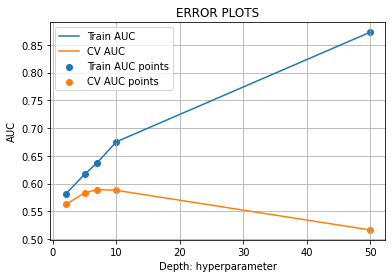

In [19]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [2,5,7,10,50]
for i in tqdm(K):
    DT = DecisionTreeClassifier(max_depth = i)
    DT.fit(X_tr, y_train)

    y_train_pred = batch_predict(DT, X_tr)    
    y_cv_pred = batch_predict(DT, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [20]:
from sklearn.model_selection import RandomizedSearchCV

DT = DecisionTreeClassifier(random_state=0)
parameters = {'max_depth': [2,5,7,10,50]}
clf = RandomizedSearchCV(DT, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)
print(clf.best_params_)

{'max_depth': 5}


In [24]:
print(clf.cv_results_)

{'mean_fit_time': array([ 0.7461675 ,  2.00113527,  3.00055353,  4.70694248, 21.41613173]), 'std_fit_time': array([0.00326479, 0.07507782, 0.07203411, 0.29838681, 0.39838578]), 'mean_score_time': array([0.01318987, 0.01312606, 0.0135026 , 0.01343791, 0.01420776]), 'std_score_time': array([0.00015175, 0.00027104, 0.00013975, 0.00025657, 0.00027763]), 'param_max_depth': masked_array(data=[2, 5, 7, 10, 50],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 2}, {'max_depth': 5}, {'max_depth': 7}, {'max_depth': 10}, {'max_depth': 50}], 'split0_test_score': array([0.56628661, 0.57479651, 0.57116492, 0.5573102 , 0.52366379]), 'split1_test_score': array([0.57455959, 0.58577191, 0.58187522, 0.58158796, 0.52811185]), 'split2_test_score': array([0.56059199, 0.58067554, 0.58063688, 0.56466259, 0.50789036]), 'mean_test_score': array([0.56714606, 0.58041465, 0.57789234, 0.56785359, 0.51988867]), 'std_test_score': array([

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=0)
parameters = {'min_samples_split':[10, 50, 100 ,150 ,200]}
clf1 = RandomizedSearchCV(DT, parameters, cv=3, scoring='roc_auc')
clf1.fit(X_tr, y_train)
print(clf1.best_params_)

{'min_samples_split': 200}


In [27]:
print( clf1.cv_results_)

{'mean_fit_time': array([80.99300019, 80.46255302, 80.27381579, 80.57811046, 80.85776393]), 'std_fit_time': array([7.60773245, 4.36293335, 5.96472985, 5.99391844, 5.2353759 ]), 'mean_score_time': array([0.01796881, 0.0177087 , 0.01817576, 0.01813873, 0.01803867]), 'std_score_time': array([0.0006069 , 0.00041221, 0.00046644, 0.00097242, 0.00075477]), 'param_min_samples_split': masked_array(data=[10, 50, 100, 150, 200],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'min_samples_split': 10}, {'min_samples_split': 50}, {'min_samples_split': 100}, {'min_samples_split': 150}, {'min_samples_split': 200}], 'split0_test_score': array([0.52042232, 0.53116442, 0.53093382, 0.53310053, 0.53722488]), 'split1_test_score': array([0.52162799, 0.53798606, 0.53211175, 0.53832163, 0.54596348]), 'split2_test_score': array([0.52616867, 0.52225352, 0.53085917, 0.53373958, 0.5415497 ]), 'mean_test_score': array([0.52273966, 0.530468  , 0.5

# Representation of results

In [51]:
AUC=[]
for i in (10, 50, 100 ,150 ,200):
  auc=[]
  for j in (2,5,7,10,50):
    model=DecisionTreeClassifier(splitter='best', max_depth=j, min_samples_split=i)
    model.fit(X_tr,y_train)
    y_train_pred = batch_predict(model, X_tr)
    auc.append(roc_auc_score(y_train,y_train_pred))
  AUC.append(auc)

In [36]:

x1=clf1.cv_results_['param_min_samples_split']
y1=clf.cv_results_['param_max_depth']
print(AUC)
arr = np.asarray(AUC)
arr.shape

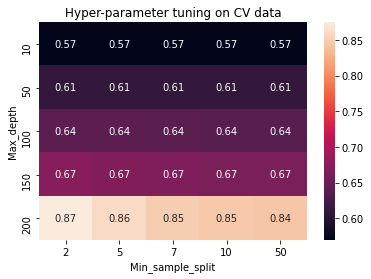

In [56]:
import seaborn as sns
sns.heatmap(arr.T,annot=True,xticklabels=y1,yticklabels=x1)
plt.xlabel("Min_sample_split")
plt.ylabel("Max_depth")
plt.title("Hyper-parameter tuning on CV data")
plt.show()

# Testing the performance of the model on test data, plotting ROC Curves

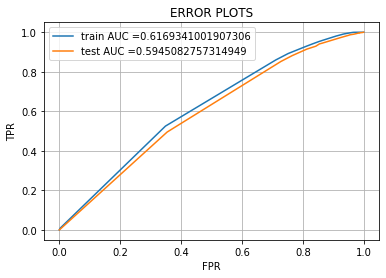

In [29]:
best_Depth = 5
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


DT = DecisionTreeClassifier(max_depth=best_Depth)
DT.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(DT, X_tr)    
y_test_pred = batch_predict(DT, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [30]:
print(y_test_pred)

[0.8867219538868131, 0.8288004204440941, 0.8867219538868131, 0.8867219538868131, 0.8867219538868131, 0.8288004204440941, 0.8288004204440941, 0.8288004204440941, 0.8288004204440941, 0.8867219538868131, 0.764505119453925, 0.8867219538868131, 0.8068783068783069, 0.8288004204440941, 0.764505119453925, 0.8867219538868131, 0.8867219538868131, 0.8867219538868131, 0.7189097103918228, 0.8867219538868131, 0.8288004204440941, 0.8288004204440941, 0.8867219538868131, 0.8867219538868131, 0.8288004204440941, 0.8867219538868131, 0.8068783068783069, 0.8867219538868131, 0.8867219538868131, 0.8068783068783069, 0.8288004204440941, 0.8068783068783069, 0.7549295774647887, 0.8288004204440941, 0.8867219538868131, 0.8288004204440941, 0.8288004204440941, 0.8867219538868131, 0.764505119453925, 0.8288004204440941, 0.8288004204440941, 0.8288004204440941, 0.8867219538868131, 0.8867219538868131, 0.1, 0.8867219538868131, 0.764505119453925, 0.8288004204440941, 0.7189097103918228, 0.8867219538868131, 0.8288004204440941

In [31]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [47]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
# print("Train confusion matrix")
# print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
array = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(array)

lst1 = list(y_test)
lst2 = (predict_with_best_t(y_test_pred, best_t))
print(lst1)
print(lst2)

the maximum value of tpr*(1-fpr) 0.3420001992156805 for threshold 0.887
Test confusion matrix
[[1706  936]
 [6998 6860]]
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [94]:
l1=[]
for i in range(len(lst1)):
  if lst1[i] == 0 and lst2[i]== 1:
    l1.append(i)

print((l1))
df=pd.DataFrame(columns=list(X_test.columns))
for i in l1:
    df.loc[len(df.index)]=X_test.iloc[i]

df.head(2)


[3, 23, 27, 76, 95, 140, 155, 167, 182, 187, 202, 239, 240, 247, 267, 280, 290, 316, 320, 334, 344, 348, 353, 359, 379, 383, 384, 399, 404, 441, 456, 470, 520, 528, 535, 541, 554, 565, 577, 581, 615, 616, 662, 692, 700, 703, 730, 742, 746, 761, 768, 811, 834, 845, 847, 850, 860, 875, 880, 896, 940, 1075, 1142, 1145, 1147, 1162, 1168, 1169, 1176, 1191, 1198, 1306, 1348, 1385, 1414, 1459, 1477, 1502, 1538, 1547, 1556, 1557, 1560, 1561, 1569, 1599, 1606, 1620, 1672, 1688, 1698, 1739, 1751, 1767, 1774, 1788, 1811, 1855, 1886, 1889, 1926, 1933, 1984, 1990, 2017, 2021, 2031, 2045, 2048, 2069, 2083, 2088, 2091, 2099, 2100, 2107, 2108, 2133, 2154, 2175, 2235, 2283, 2311, 2363, 2374, 2403, 2424, 2442, 2461, 2488, 2503, 2508, 2533, 2560, 2561, 2567, 2581, 2588, 2600, 2626, 2641, 2658, 2665, 2679, 2697, 2717, 2721, 2725, 2735, 2760, 2768, 2770, 2774, 2776, 2788, 2791, 2810, 2828, 2843, 2868, 2876, 2889, 2894, 2932, 2989, 2993, 3030, 3118, 3125, 3170, 3173, 3193, 3196, 3257, 3278, 3279, 3316, 3363

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
0,tx,mrs,grades_9_12,0,math_science appliedlearning,appliedsciences college_careerprep,my students amazing group 7th 12th graders ver...,433.26,0.013,0.774,0.213,0.9821
1,az,ms,grades_prek_2,2,math_science literacy_language,health_lifescience literacy,my first grade students curious enthusiastic t...,8.24,0.017,0.646,0.336,0.9963


In [83]:
len(df.index)

936

# wordcloud plot

In [90]:
!pip install wordcloud

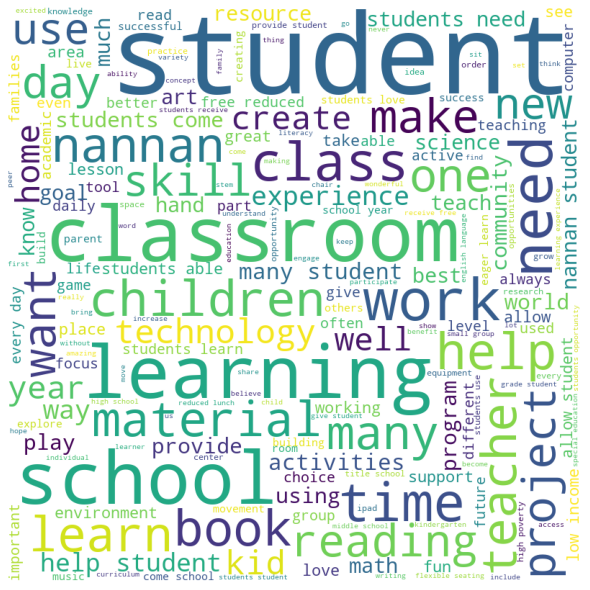

In [91]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.essay:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


No handles with labels found to put in legend.


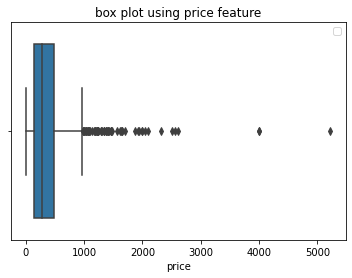

In [97]:
x = df['price']
sns.boxplot(x=x,data=df)

plt.title("box plot using price feature")
plt.legend()
plt.show()

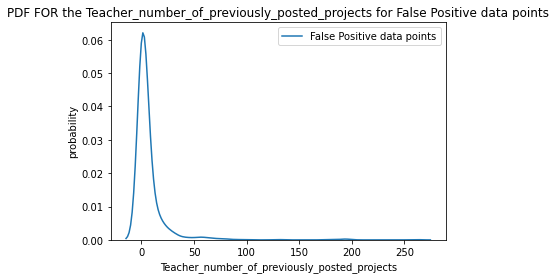

In [104]:
sns.distplot(df['teacher_number_of_previously_posted_projects'], hist=False, label="False Positive data points") 
plt.title('PDF FOR the Teacher_number_of_previously_posted_projects for False Positive data points') 
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

## ###For set2

## Make Data Model Ready: encoding eassay AVG W2V featurization

In [106]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/MyDrive/dataset/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [108]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))


100%|██████████| 22445/22445 [00:07<00:00, 3047.81it/s]

22445
300


In [110]:
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

100%|██████████| 11055/11055 [00:03<00:00, 3022.14it/s]


In [111]:
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

100%|██████████| 16500/16500 [00:05<00:00, 3109.74it/s]


In [113]:
#concatinating all feature

from scipy.sparse import hstack
X_tr = hstack((avg_w2v_vectors_train,X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_cate,X_train_clean_subcate, X_train_price_norm,X_train_proj_posted_norm,X_train_neg_norm,X_train_neu_norm,X_train_price_pos,X_train_price_compound)).tocsr()
X_cr = hstack((avg_w2v_vectors_cv, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_cate,X_cv_clean_subcate, X_cv_price_norm,X_cv_proj_posted_norm,X_cv_neg_norm,X_cv_neu_norm,X_cv_price_pos,X_cv_price_compound)).tocsr()
X_te = hstack((avg_w2v_vectors_test, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_cate,X_test_clean_subcate, X_test_price_norm,X_test_proj_posted_norm,X_test_neg_norm,X_test_neu_norm,X_test_price_pos,X_test_price_compound)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)



Final Data matrix
(22445, 405) (22445,)
(11055, 405) (11055,)
(16500, 405) (16500,)


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_tr, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# HyperParameterTuning of depth and min_sample_split

In [115]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████| 5/5 [01:21<00:00, 16.27s/it]


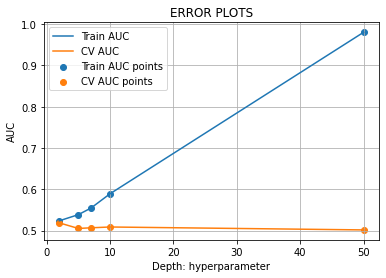

In [116]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [2,5,7,10,50]
for i in tqdm(K):
    DT = DecisionTreeClassifier(max_depth = i)
    DT.fit(X_tr, y_train)

    y_train_pred = batch_predict(DT, X_tr)    
    y_cv_pred = batch_predict(DT, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [117]:
from sklearn.model_selection import RandomizedSearchCV

DT = DecisionTreeClassifier(random_state=0)
parameters = {'max_depth': [2,5,7,10,50]}
clf = RandomizedSearchCV(DT, parameters, cv=3, scoring='roc_auc')
clf.fit(X_tr, y_train)
print(clf.best_params_)

{'max_depth': 50}


In [118]:
print(clf.cv_results_)

{'mean_fit_time': array([ 1.36941377,  3.26528215,  4.64034716,  6.64897617, 31.20912584]), 'std_fit_time': array([0.02551716, 0.02531507, 0.0749151 , 0.1529871 , 0.68224903]), 'mean_score_time': array([0.01173671, 0.01139625, 0.01303363, 0.01140698, 0.01195598]), 'std_score_time': array([0.00136929, 0.00067431, 0.00134438, 0.00041493, 0.00012654]), 'param_max_depth': masked_array(data=[2, 5, 7, 10, 50],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 2}, {'max_depth': 5}, {'max_depth': 7}, {'max_depth': 10}, {'max_depth': 50}], 'split0_test_score': array([0.50011676, 0.50807321, 0.51175356, 0.50272454, 0.51047563]), 'split1_test_score': array([0.49723037, 0.50810453, 0.49709331, 0.49809758, 0.50869066]), 'split2_test_score': array([0.50041683, 0.49432173, 0.49542735, 0.51086225, 0.50018566]), 'mean_test_score': array([0.49925465, 0.50349983, 0.50142474, 0.50389479, 0.50645065]), 'std_test_score': array([

In [119]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=0)
parameters = {'min_samples_split':[10, 50, 100 ,150 ,200]}
clf1 = RandomizedSearchCV(DT, parameters, cv=3, scoring='roc_auc')
clf1.fit(X_tr, y_train)
print(clf1.best_params_)

{'min_samples_split': 10}


In [120]:
print( clf1.cv_results_)

{'mean_fit_time': array([32.70422212, 32.22136259, 30.78392227, 29.6962676 , 28.08444619]), 'std_fit_time': array([1.97223726, 1.92103349, 2.16495195, 2.320156  , 2.49554707]), 'mean_score_time': array([0.01232417, 0.01217739, 0.01308481, 0.01208337, 0.01214337]), 'std_score_time': array([0.00010239, 0.00020875, 0.00158787, 0.00023185, 0.00014459]), 'param_min_samples_split': masked_array(data=[10, 50, 100, 150, 200],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'min_samples_split': 10}, {'min_samples_split': 50}, {'min_samples_split': 100}, {'min_samples_split': 150}, {'min_samples_split': 200}], 'split0_test_score': array([0.50055006, 0.49810115, 0.49831654, 0.49540523, 0.49608075]), 'split1_test_score': array([0.50674159, 0.50605988, 0.50170257, 0.49673291, 0.49318209]), 'split2_test_score': array([0.50517169, 0.4980012 , 0.49429184, 0.49745624, 0.49509548]), 'mean_test_score': array([0.50415445, 0.50072074, 0.4

# Representation of results

In [121]:
AUC=[]
for i in (10, 50, 100 ,150 ,200):
  auc=[]
  for j in (2,5,7,10,50):
    model=DecisionTreeClassifier(splitter='best', max_depth=j, min_samples_split=i)
    model.fit(X_tr,y_train)
    y_train_pred = batch_predict(model, X_tr)
    auc.append(roc_auc_score(y_train,y_train_pred))
  AUC.append(auc)


In [122]:

x1=clf1.cv_results_['param_min_samples_split']
y1=clf.cv_results_['param_max_depth']
print(AUC)
arr = np.asarray(AUC)
arr.shape

[[0.5237919450459856, 0.5384801466817677, 0.5542955917996923, 0.588286966498563, 0.9719789495430952], [0.5237919450459856, 0.5370700390684084, 0.5518656696044831, 0.5827179142856088, 0.9319643477715515], [0.5237919450459856, 0.5370438016254523, 0.5490573409133671, 0.577820469780088, 0.9021060491472461], [0.5237919450459856, 0.5370342245160719, 0.5490213345237085, 0.5761355183112412, 0.8765486621191383], [0.5237919450459856, 0.5370342245160719, 0.5490213345237085, 0.5749751017291184, 0.856427140554041]]


(5, 5)

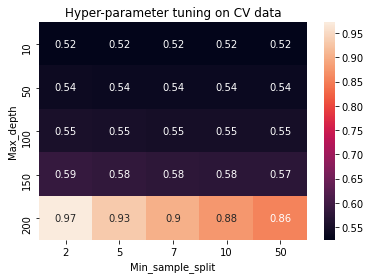

In [123]:
import seaborn as sns
sns.heatmap(arr.T,annot=True,xticklabels=y1,yticklabels=x1)
plt.xlabel("Min_sample_split")
plt.ylabel("Max_depth")
plt.title("Hyper-parameter tuning on CV data")
plt.show()

# Testing the performance of the model on test data, plotting ROC Curves

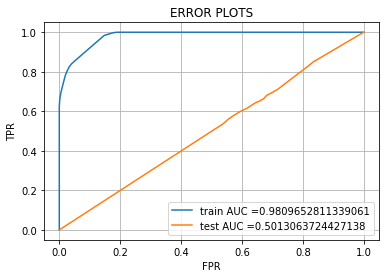

In [124]:
best_Depth = 50
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


DT = DecisionTreeClassifier(max_depth=best_Depth)
DT.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(DT, X_tr)    
y_test_pred = batch_predict(DT, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [125]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [126]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
# print("Train confusion matrix")
# print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
array = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
print(array)

lst1 = list(y_test)
lst2 = (predict_with_best_t(y_test_pred, best_t))
print(lst1)
print(lst2)

the maximum value of tpr*(1-fpr) 0.838601255058787 for threshold 0.875
Test confusion matrix
[[  470  2172]
 [ 2300 11558]]
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [127]:
l1=[]
for i in range(len(lst1)):
  if lst1[i] == 0 and lst2[i]== 1:
    l1.append(i)

print((l1))
df=pd.DataFrame(columns=list(X_test.columns))
for i in l1:
    df.loc[len(df.index)]=X_test.iloc[i]

df.head(2)


[3, 5, 14, 21, 27, 35, 36, 40, 47, 66, 76, 87, 95, 107, 113, 118, 130, 131, 140, 155, 174, 175, 185, 195, 196, 202, 203, 206, 207, 212, 225, 240, 242, 243, 247, 266, 267, 268, 271, 280, 286, 290, 301, 303, 308, 310, 334, 344, 346, 348, 353, 357, 372, 376, 379, 399, 404, 424, 426, 441, 447, 453, 456, 470, 473, 478, 484, 501, 502, 506, 510, 517, 520, 521, 527, 528, 535, 541, 554, 555, 566, 577, 581, 595, 616, 652, 659, 662, 664, 675, 692, 703, 708, 712, 722, 730, 742, 745, 746, 760, 761, 768, 771, 779, 807, 811, 827, 834, 845, 860, 864, 871, 875, 880, 920, 922, 932, 936, 940, 967, 970, 973, 988, 990, 991, 1036, 1043, 1079, 1081, 1091, 1098, 1125, 1127, 1142, 1145, 1146, 1151, 1162, 1168, 1169, 1176, 1183, 1191, 1192, 1198, 1202, 1205, 1209, 1226, 1227, 1235, 1245, 1247, 1260, 1268, 1274, 1285, 1301, 1306, 1322, 1334, 1338, 1348, 1357, 1359, 1370, 1373, 1384, 1385, 1414, 1418, 1420, 1423, 1435, 1441, 1442, 1459, 1467, 1473, 1475, 1502, 1511, 1527, 1530, 1533, 1538, 1539, 1547, 1556, 1561,

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,neu,pos,compound
0,tx,mrs,grades_9_12,0,math_science appliedlearning,appliedsciences college_careerprep,my students amazing group 7th 12th graders ver...,433.26,0.013,0.774,0.213,0.9821
1,ct,ms,grades_3_5,58,health_sports,nutritioneducation,i lucky teacher twenty five students hard work...,289.46,0.021,0.663,0.316,0.9929


# wordcloud plot

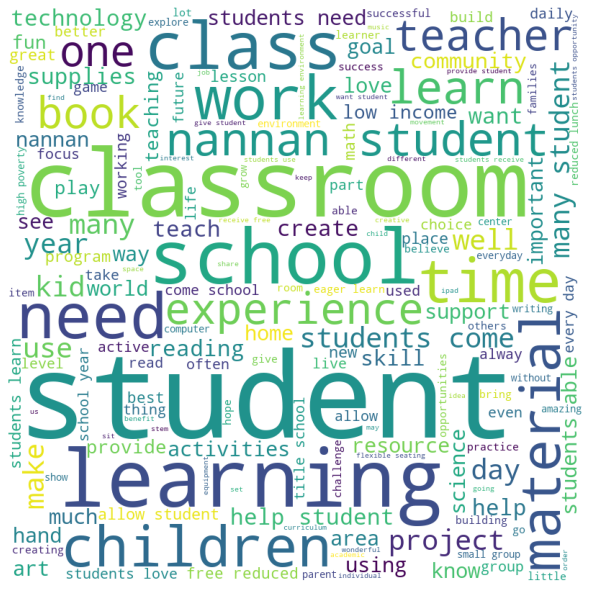

In [128]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.essay:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


No handles with labels found to put in legend.


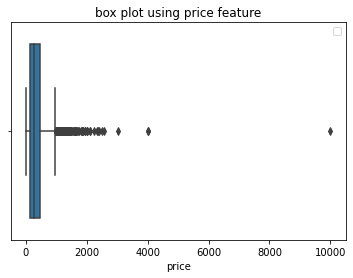

In [129]:
x = df['price']
sns.boxplot(x=x,data=df)
plt.title("box plot using price feature")
plt.legend()
plt.show()

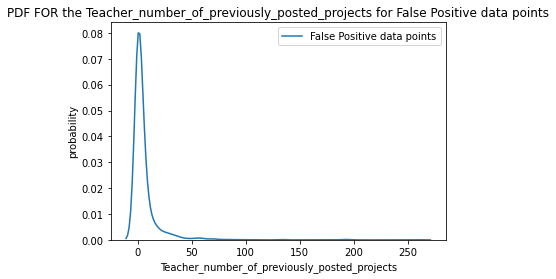

In [130]:
sns.distplot(df['teacher_number_of_previously_posted_projects'], hist=False, label="False Positive data points") 
plt.title('PDF FOR the Teacher_number_of_previously_posted_projects for False Positive data points') 
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

# #Task 2

# #applying feature importance on set1

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_tr, y_train)  


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [134]:
clf.feature_importances_

array([0.        , 0.        , 0.00060903, ..., 0.        , 0.        ,
       0.        ])

# HyperParameterTuning of depth and min_sample_split

In [136]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████| 5/5 [00:55<00:00, 11.02s/it]


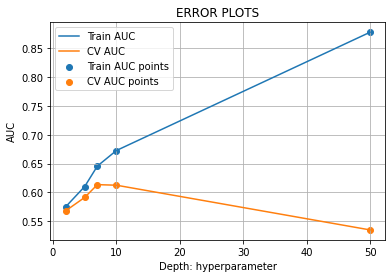

In [137]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
K = [2,5,7,10,50]
for i in tqdm(K):
    DT = DecisionTreeClassifier(max_depth = i)
    DT.fit(X_tr, y_train)

    y_train_pred = batch_predict(DT, X_tr)    
    y_cv_pred = batch_predict(DT, X_cr)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

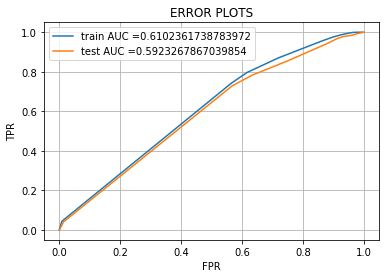

In [138]:
best_Depth = 5
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


DT = DecisionTreeClassifier(max_depth=best_Depth)
DT.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(DT, X_tr)    
y_test_pred = batch_predict(DT, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Summarizing result

In [140]:
data = pd.read_csv("/content/drive/MyDrive/dataset/summaryfile.csv",encoding='latin-1')
data

,Vectorizer,Model,Hyper parameter,AUC
0,TFIDF,Decision tree,"max_depth=5 ,min_sample_Split=200",0.65
1,TFIDFW2V,Decision tree,"max_depth=50 ,min_sample_Split=",0.51
